# 8 Data Visualization

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
matplotlib.rcParams['figure.figsize'] = (8, 6)

Populating the interactive namespace from numpy and matplotlib


Data source: [CO2 emissions (kt) from World Bank](https://data.worldbank.org/indicator/EN.ATM.CO2E.KT)

In [125]:
df_co2_data = pd.read_csv("API_EN.ATM.CO2E.KT_DS2_en_csv_v2.csv", skiprows=4)
df_co2_data = df_co2_data.set_index('Country Code').drop(['Indicator Name', 'Indicator Code', '2015', '2016', 'Unnamed: 61'], axis=1)
df_co2_data.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2720.914,2717.247,2823.590,2658.575,2629.239,2508.228,2500.894,1349.456,861.745,872.746
AFG,Afghanistan,414.371,491.378,689.396,707.731,839.743,1008.425,1092.766,1283.450,1224.778,...,1327.454,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,10014.577,9809.225
AGO,Angola,550.050,454.708,1180.774,1151.438,1224.778,1188.108,1554.808,993.757,1672.152,...,19156.408,22266.024,25151.953,25709.337,27792.193,29057.308,30340.758,33399.036,32617.965,34763.160
ALB,Albania,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,2552.232,2680.577,3072.946,...,4253.720,3898.021,3927.357,4374.731,4378.398,4598.418,5240.143,4910.113,5064.127,5716.853
AND,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,575.719,546.383,539.049,539.049,517.047,517.047,491.378,487.711,476.710,462.042


In [126]:
df_co2_countries = pd.read_csv("Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2.csv")
df_co2_countries = df_co2_countries.set_index('Country Code').drop(['SpecialNotes', 'Unnamed: 5'], axis=1)
df_co2_countries.head()

,Region,IncomeGroup,TableName
Country Code,,,
ABW,Latin America & Caribbean,High income,Aruba
AFG,South Asia,Low income,Afghanistan
AGO,Sub-Saharan Africa,Lower middle income,Angola
ALB,Europe & Central Asia,Upper middle income,Albania
AND,Europe & Central Asia,High income,Andorra


Pre-defined styles provided by matplotlib

In [4]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [117]:
plt.style.use('fivethirtyeight')

## Pandas Plot Types

| kind      | Chart Type                   |
|-----------|------------------------------|
| 'line'    | Line plot                    |
| 'bar'     | Horizontal bar plot          |
| 'barh'    | Vertical bar plot            |
| 'hist'    | Histogram                    |
| 'box'     | Boxplot                      |
| 'density' | Kernel Density Estimate plot |
| 'area'    | Area plot                    |
| 'pie'     | Pie chart                    |
| 'scatter' | Scatter plot                 |
| 'hexbin'  | Hexbin plot                  |

## Line Plot

In [136]:
df_wide = df_co2_data.loc[['WLD', 'CHN', 'USA'], df_co2_data.columns[1:]].T
df_wide = df_wide.rename_axis('Year').reset_index().rename_axis('', axis=1)
df_wide.head()

,Year,WLD,CHN,USA
0,1960,9.396706e+06,780726.302,2890696.100
1,1961,9.434403e+06,552066.850,2880505.507
2,1962,9.818840e+06,440359.029,2987207.873
3,1963,1.035575e+07,436695.696,3119230.874
4,1964,1.094701e+07,436923.050,3255995.306


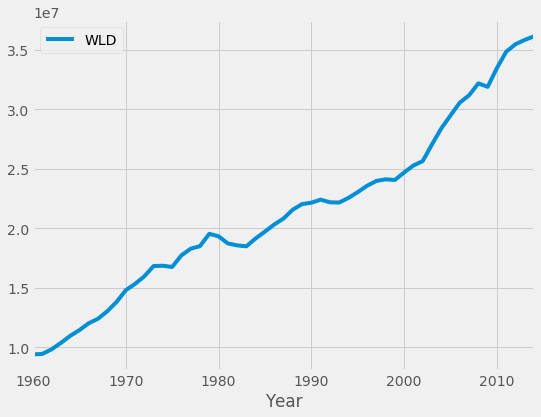

In [119]:
df_wide.plot(x='Year', y='WLD', kind='line')

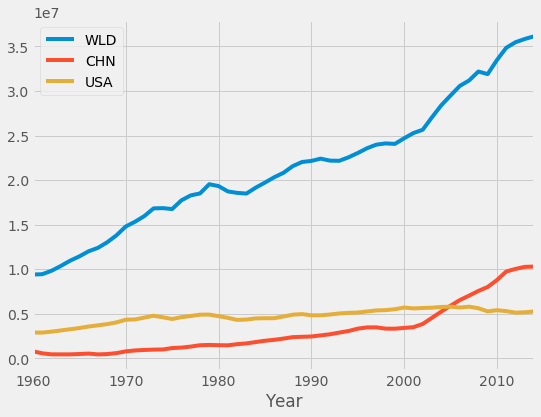

In [120]:
df_wide.plot(x='Year', y=['WLD', 'CHN', 'USA'], kind='line')

In [140]:
df_long = df_co2_data.loc[['WLD', 'CHN', 'USA'], df_co2_data.columns[1:]].T
df_long = df_long.unstack().reset_index().rename(columns={'level_1': 'Year', 0: 'CO2'})
df_long.head()

,Country Code,Year,CO2
0,WLD,1960,9.396706e+06
1,WLD,1961,9.434403e+06
2,WLD,1962,9.818840e+06
3,WLD,1963,1.035575e+07
4,WLD,1964,1.094701e+07


Country Code
CHN    Axes(0.08,0.07;0.87x0.81)
USA    Axes(0.08,0.07;0.87x0.81)
WLD    Axes(0.08,0.07;0.87x0.81)
dtype: object

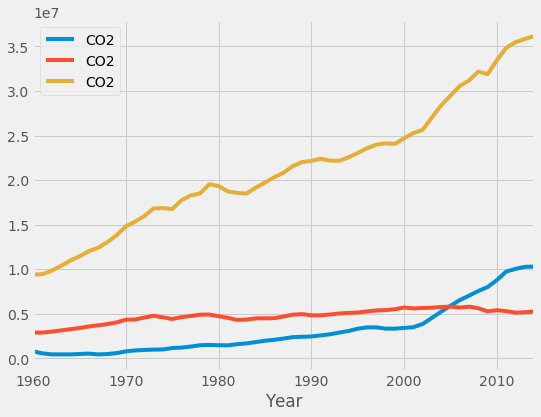

In [145]:
fig, ax = plt.subplots(1,1)
df_long.groupby('Country Code').plot(x='Year', y='CO2', kind='line', ax=ax)